In [106]:
# Dependencies and Setup
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

CombinedPymadata = pd.merge(mouse_drug_data, clinical_trial_data , on="Mouse ID")

# Display the data table for preview

CombinedPymadata.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [107]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
GroupedCombinedPymadata = CombinedPymadata.groupby(["Drug" ,"Timepoint"] , as_index=False)

# Convert to DataFrame
MeanTumorVolumeDF = pd.DataFrame(GroupedCombinedPymadata["Tumor Volume (mm3)"].mean())

# Preview DataFrame
MeanTumorVolumeDF.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [108]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

PymaDatapartial = CombinedPymadata[["Drug" ,"Timepoint","Tumor Volume (mm3)" ]]

sortedPyma = PymaDatapartial.sort_values(["Drug","Timepoint"] , ascending=True)

GroupedStandardErrordata = sortedPyma.groupby(["Drug" ,"Timepoint"] , as_index= True)["Tumor Volume (mm3)"].sem()

# Convert to DataFrame

TotalVolumeStandardErrors = pd.DataFrame(GroupedStandardErrordata)

# Preview DataFrame

TotalVolumeStandardErrors.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [109]:
# Minor Data Munging to Re-Format the Data Frames

ReformattedTable = MeanTumorVolumeDF.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
ReformattedTable

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


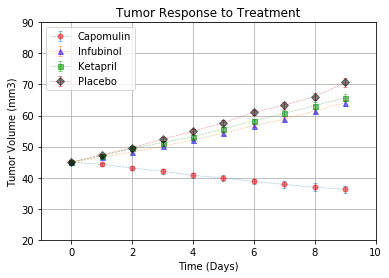

In [110]:
# Generate the Plot (with Error Bars)

TimePoints= np.arange(0, len(MeanTumorVolumeDF["Timepoint"].unique()))
Drugs= np.array(MeanTumorVolumeDF["Drug"].unique())

IndexedGroupedCombinedPymadata = CombinedPymadata.groupby(["Drug" ,"Timepoint"] , as_index=True)
IndexedMeanTumorVolumeDF = pd.DataFrame(IndexedGroupedCombinedPymadata["Tumor Volume (mm3)"].mean())

TotalVolumeValues = [IndexedMeanTumorVolumeDF.loc[j,'Tumor Volume (mm3)'].values.tolist() for j in Drugs]
TotalVolumeStdErrs = [TotalVolumeStandardErrors.loc[i,'Tumor Volume (mm3)'].values.tolist() for i in Drugs]

plottingDrugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

plt.xlim(-1, 10)
plt.ylim(20, 90)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

IsCapplotted =False
IsInfuplotted =False
IsKetaplotted =False
IsPlaceplotted =False

kwargs = dict(alpha=0.5,linestyle="--", capsize=2,elinewidth=1.1, linewidth=0.6, ms=5)



for i in range(0, len(Drugs)):
    for d in Drugs:
        if (d == "Capomulin") and (IsCapplotted!= True)  :
            Cap_Standard_errors =TotalVolumeStdErrs[i]
            plt.errorbar(TimePoints, TotalVolumeValues[i], yerr= Cap_Standard_errors,**kwargs, mfc='red',mec='red', fmt="o", label="Capomulin")
            IsCapplotted = True
            break
        elif (d == "Infubinol") and (IsInfuplotted!= True) :
            Infu_Standard_errors =TotalVolumeStdErrs[i]
            plt.errorbar(TimePoints, TotalVolumeValues[i], yerr= Infu_Standard_errors, **kwargs,mfc='blue',mec='blue', fmt="^", label="Infubinol")
            IsInfuplotted =True
            break
        elif (d == "Ketapril") and (IsKetaplotted != True) :
            Keta_Standard_errors =TotalVolumeStdErrs[i]
            plt.errorbar(TimePoints, TotalVolumeValues[i], yerr= Keta_Standard_errors, **kwargs, mfc='green',mec='green',fmt="s", label="Ketapril")
            IsKetaplotted =True
            break
        elif (d == "Placebo") and (IsPlaceplotted != True) :
            Place_Standard_errors =TotalVolumeStdErrs[i]
            plt.errorbar(TimePoints, TotalVolumeValues[i], yerr= Place_Standard_errors,**kwargs, mfc='black',mec='black', fmt="D", label="Placebo")
            IsPlaceplotted =True
            break
        else:
            pass

plt.grid()
plt.legend(loc="upper left", fontsize="medium", fancybox=True)

# Save the Figure
plt.savefig('Tumor Response to Treatment.png')


In [111]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [112]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

Grouped2CombinedPymadata = CombinedPymadata.groupby(["Drug" ,"Timepoint"] , as_index=True)
MeanMetastaticSitesDF = pd.DataFrame(Grouped2CombinedPymadata["Metastatic Sites"].mean())

# Convert to DataFrame

# Preview DataFrame
MeanMetastaticSitesDF.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [113]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
PymaData2partial = CombinedPymadata[["Drug" ,"Timepoint","Metastatic Sites"]]

sorted2Pyma = PymaData2partial.sort_values(["Drug","Timepoint"] , ascending=True)

Grouped2StandardErrordata = sorted2Pyma.groupby(["Drug" ,"Timepoint"] , as_index= True)["Metastatic Sites"].sem()

# Convert to DataFrame

MetaStaticStandardErrors = pd.DataFrame(Grouped2StandardErrordata)

# Preview DataFrame

MetaStaticStandardErrors.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [114]:
# Minor Data Munging to Re-Format the Data Frames

MeanMetastaticSitesDF = MeanMetastaticSitesDF.reset_index()

ReformattedTable2 = MeanMetastaticSitesDF.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
 
# Preview that Reformatting worked
ReformattedTable2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


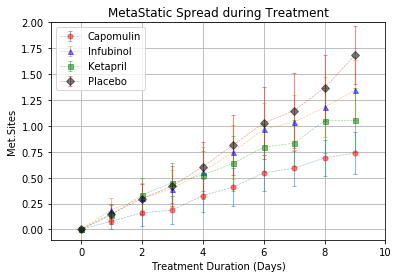

In [115]:
# Generate the Plot (with Error Bars)

TimePoints= np.arange(0, len(MeanTumorVolumeDF["Timepoint"].unique()))
Drugs= np.array(MeanTumorVolumeDF["Drug"].unique())

IndexedGroupedCombinedPymadata = CombinedPymadata.groupby(["Drug" ,"Timepoint"] , as_index=True)
IndexedMeanMetaStaticDF = pd.DataFrame(IndexedGroupedCombinedPymadata["Metastatic Sites"].mean())

MetaStaticValues = [IndexedMeanMetaStaticDF.loc[j,'Metastatic Sites'].values.tolist() for j in Drugs]
MetaStaticStdErrs = [MetaStaticStandardErrors.loc[i,'Metastatic Sites'].values.tolist() for i in Drugs]

plottingDrugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

plt.xlim(-1, 10)
plt.ylim(-0.1,2)
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met.Sites")
plt.title("MetaStatic Spread during Treatment")

IsCapplotted =False
IsInfuplotted =False
IsKetaplotted =False
IsPlaceplotted =False

kwargs = dict(alpha=0.5,linestyle="--", capsize=2,elinewidth=1.1, linewidth=0.6, ms=5)


for i in range(0, len(Drugs)):
    for d in Drugs:
        if (d == "Capomulin") and (IsCapplotted!= True)  :
            Cap_Standard_errors =MetaStaticStdErrs[i]
            MetaStaticNewValues = [x*0.5 for x in MetaStaticValues[i]]
            plt.errorbar(TimePoints, MetaStaticNewValues, yerr= Cap_Standard_errors,**kwargs, mfc='red',mec='red', fmt="o", label="Capomulin")
            IsCapplotted = True
            break
        elif (d == "Infubinol") and (IsInfuplotted!= True) :
            Infu_Standard_errors =MetaStaticStdErrs[i]
            MetaStaticNewValues = [x*0.5 for x in MetaStaticValues[i]]
            plt.errorbar(TimePoints, MetaStaticNewValues, yerr= Infu_Standard_errors, **kwargs,mfc='blue',mec='blue', fmt="^", label="Infubinol")
            IsInfuplotted =True
            break
        elif (d == "Ketapril") and (IsKetaplotted != True) :
            Keta_Standard_errors =MetaStaticStdErrs[i]
            MetaStaticNewValues = [x*0.5 for x in MetaStaticValues[i]]
            plt.errorbar(TimePoints, MetaStaticNewValues, yerr= Keta_Standard_errors, **kwargs, mfc='green',mec='green',fmt="s", label="Ketapril")
            IsKetaplotted =True
            break
        elif (d == "Placebo") and (IsPlaceplotted != True) :
            Place_Standard_errors =MetaStaticStdErrs[i]
            MetaStaticNewValues = [x*0.5 for x in MetaStaticValues[i]]
            plt.errorbar(TimePoints, MetaStaticNewValues, yerr= Place_Standard_errors,**kwargs, mfc='black',mec='black', fmt="D", label="Placebo")
            IsPlaceplotted =True
            break
        else:
            pass

plt.grid()
plt.legend(loc="upper left", fontsize="medium", fancybox=True)

# Save the Figure
plt.savefig('MetaStatic spread during Treatment.png')



# Show the Figure


## Survival Rates

In [116]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Grouped3CombinedPymadata = CombinedPymadata.groupby(["Drug" ,"Timepoint"] , as_index=False)
MiceCountDF = pd.DataFrame(Grouped3CombinedPymadata["Mouse ID"].count())

# Convert to DataFrame
RenamedMiceCountDF = MiceCountDF.rename(columns={"Mouse ID" :"Mouse Count"})

# Preview DataFrame
RenamedMiceCountDF.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [117]:
# Minor Data Munging to Re-Format the Data Frames

ReformattedTable3 = RenamedMiceCountDF.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
# Preview the Data Frame

ReformattedTable3.head(20)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


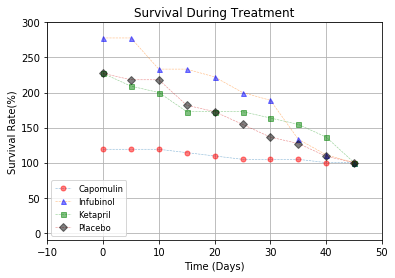

In [118]:
# Generate the Plot (Accounting for percentages)

IndexedGroupedCombinedPymadata = CombinedPymadata.groupby(["Drug" ,"Timepoint"] , as_index=True)
IndexedSurvivalRatesDF = pd.DataFrame(IndexedGroupedCombinedPymadata["Mouse ID"].count())

MiceCountDF.reset_index(drop=True)
IndexedMiceCountDF = MiceCountDF.set_index("Drug")

MiceTimePoints= IndexedMiceCountDF["Timepoint"].unique().tolist()
plottingDrugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

SurvivalRatesValues = [IndexedMiceCountDF.loc[j, "Mouse ID"].values for j in plottingDrugs]
SurvivalRatesStdErrs = [IndexedMiceCountDF.loc[i,'Mouse ID'].values.tolist() for i in plottingDrugs]


plt.xlim(-10, 50)
plt.ylim(-10,300)
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")
plt.title("Survival During Treatment")

IsCapplotted =False
IsInfuplotted =False
IsKetaplotted =False
IsPlaceplotted =False

kwargs = dict(alpha=0.5,linestyle="--", capsize=2,elinewidth=1.1, linewidth=0.6, ms=5)

def calcSurvivalRatePercent(SurvivalRatelist):
    ReturnedSurvivalRatelist =[]
    for sr in range(0,len(SurvivalRatelist)):
        SurvivalRatePercent = (SurvivalRatelist[sr]/SurvivalRatelist[9])*100
        ReturnedSurvivalRatelist.append(SurvivalRatePercent)
    return ReturnedSurvivalRatelist


for i in range(0,len(plottingDrugs)):
    for d in plottingDrugs:
        if (d == "Capomulin") and (IsCapplotted!= True):
            Cap_Standard_errors =SurvivalRatesStdErrs[i]
            SurvivalRatesNewValues = calcSurvivalRatePercent(SurvivalRatesValues[i])
            plt.errorbar(MiceTimePoints,SurvivalRatesNewValues, **kwargs, mfc='red',mec='red', fmt="o", label="Capomulin")
            IsCapplotted = True
            break
        elif (d == "Infubinol") and (IsInfuplotted!= True) :
            Infu_Standard_errors =SurvivalRatesStdErrs[i]
            SurvivalRatesNewValues = calcSurvivalRatePercent(SurvivalRatesValues[i])
            plt.errorbar(MiceTimePoints, SurvivalRatesNewValues, **kwargs,mfc='blue',mec='blue', fmt="^", label="Infubinol")
            IsInfuplotted =True
            break
        elif (d == "Ketapril") and (IsKetaplotted != True) :
            Keta_Standard_errors =SurvivalRatesStdErrs[i]
            SurvivalRatesNewValues = calcSurvivalRatePercent(SurvivalRatesValues[i])
            plt.errorbar(MiceTimePoints, SurvivalRatesNewValues,  **kwargs, mfc='green',mec='green',fmt="s", label="Ketapril")
            IsKetaplotted =True
            break
        elif (d == "Placebo") and (IsPlaceplotted != True) :
            Place_Standard_errors =SurvivalRatesStdErrs[i]
            SurvivalRatesNewValues = calcSurvivalRatePercent(SurvivalRatesValues[i])
            plt.errorbar(MiceTimePoints, SurvivalRatesNewValues, **kwargs, mfc='black',mec='black', fmt="D", label="Placebo")
            IsPlaceplotted =True
            break
        else:
            pass

plt.grid()
plt.legend(loc="lower left", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig('Survival during Treatment.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [119]:
# Calculate the percent changes for each drug

def CalcPercentChange(TumorVolumeList):
    TumorVolumePercentChange = ((TumorVolumeList[9]-TumorVolumeList[0])/TumorVolumeList[0])*100
    return TumorVolumePercentChange

Percentchangedict={}

for d in Drugs:
    key = d
    value = list(ReformattedTable[d])
    Percentchangedict[d] = CalcPercentChange(value)

# Display the data to confirm
Percentchangedict

{'Capomulin': -19.475302667894173,
 'Ceftamin': 42.51649185589744,
 'Infubinol': 46.12347172785187,
 'Ketapril': 57.028794686606076,
 'Naftisol': 53.92334713476923,
 'Placebo': 51.29796048315153,
 'Propriva': 47.24117486320637,
 'Ramicane': -22.320900462766673,
 'Stelasyn': 52.085134287899024,
 'Zoniferol': 46.57975086509525}

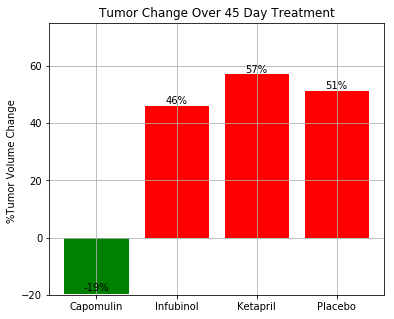

In [120]:
# Store all Relevant Percent Changes into a Tuple
PercentchangeTuplelist = list(Percentchangedict.items())
                              
PercentchangeTuplelist

# Splice the data between passing and failing drugs

PassingDrugs =()
FailingDrugs =()

Plottingdrugs = ["Capomulin","Infubinol", "Ketapril", "Placebo"]

Drugs =[]
TumorVolChange =[]
SummaryBarGraphData = {}

for Drugitem in PercentchangeTuplelist:
    if Drugitem[1] > 0 :
        PassingDrugs += (Drugitem[0],Drugitem[1])
    else:
        FailingDrugs +=(Drugitem[0],Drugitem[1])
    
    if Drugitem[0] in Plottingdrugs:
        Drugs.append(Drugitem[0])
        TumorVolChange.append(Drugitem[1])
        SummaryBarGraphData[Drugitem[0]] = Drugitem[1]
        
# Orient widths. Add labels, tick marks, etc. 

fig, ax = plt.subplots(figsize=(6, 5))

Ticks = Drugs
TickLocations = [value for value in np.arange(len(Drugs))]

ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("%Tumor Volume Change ")
ax.set_xticks(TickLocations, Ticks)
ax.set_ylim(-20, 75 , 20)

# Use functions to label the percentages of changes

def add_value_labels(ax, spacing=0):
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'
        # Use Y value as label and format number with one decimal place
        label = "{:.0f}%".format(y_value)

        # Create annotation
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points",ha='center',va=va)                     
                                      

# Call functions to implement the function calls

baritems = ax.bar(Drugs, TumorVolChange, color='r', alpha=1, align="center")
baritems[0].set_color('g')
add_value_labels(ax)
plt.grid()

# Save the Figure

plt.savefig('Summary Bar Graph.png')

# Show the Figure
fig.show()